In [11]:
import h5py

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mnist=tf.keras.datasets.mnist
(Xtr,ytr),(Xte,yte)=mnist.load_data()

In [4]:
Xval,Xtr=Xtr[:5000]/255,Xtr[5000:]/255
yval,ytr=ytr[:5000],ytr[5000:]
Xte=Xte/255

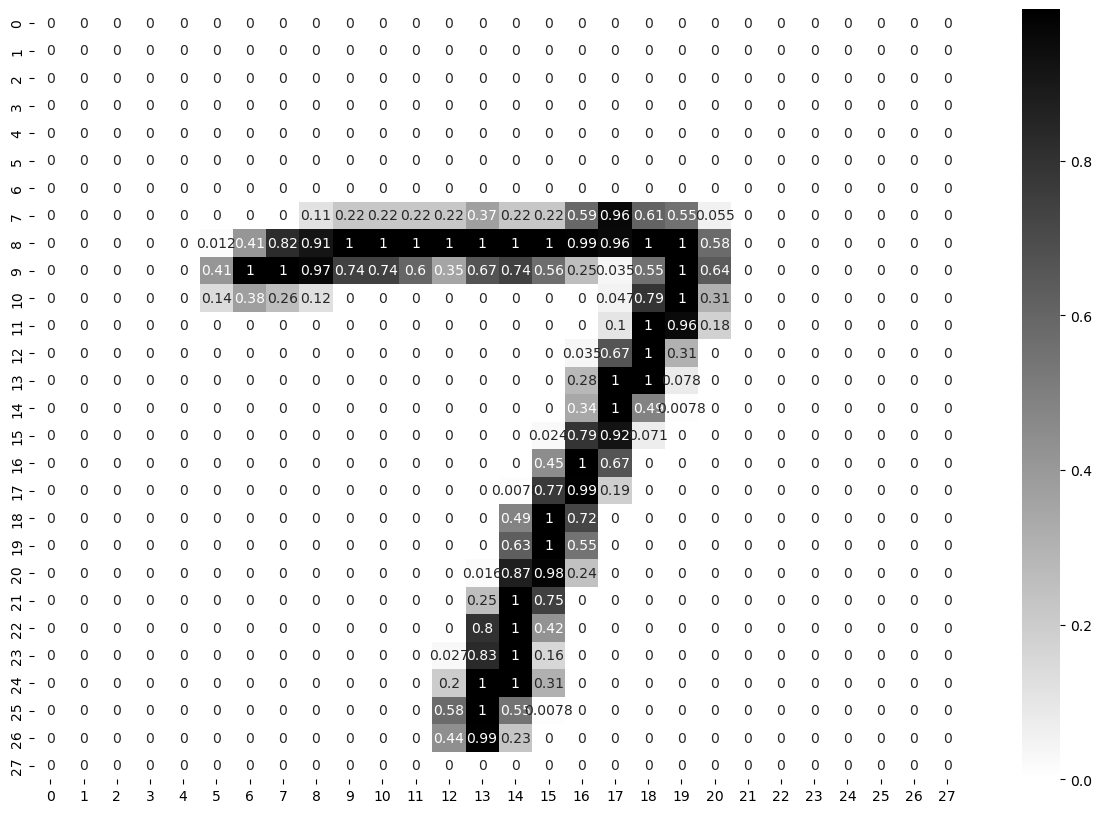

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(Xtr[100],annot=True,cmap='binary')
plt.show()

In [16]:
from tensorflow.keras.layers import Flatten as flat, Dense as dense
from tensorflow.keras.models import Sequential as seq
Layers=[
    flat(input_shape=[28,28],name='inputLayer'),
    dense(300,activation='relu',name='hiddenLayer1'),
    dense(100,activation='relu',name='hiddenLayer2'),
    dense(10,activation='softmax',name='outputLayer')
]
model_clf=seq(Layers)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
LOSS_FUNC='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']
model_clf.compile(loss=LOSS_FUNC,optimizer=OPTIMIZER,metrics=METRICS)

In [19]:
import time
import os
def get_log_path(log_dir='logs/fit'):
    fileName=time.strftime('log_%Y_%m_%d_%H_%M_%S')
    logs_path=os.path.join(log_dir,fileName)
    print(f'Saving logs at {logs_path}')
    return logs_path
log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2024_04_03_15_54_26


In [20]:
print(os.getcwd())

C:\Users\ASUS\Documents\Data Science Masters\Class Work\04 - Neural Networks\03 - Callback


In [21]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [22]:
CKPT_path='Model_ckpt.keras'
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(filepath=CKPT_path,save_best_only=True)

In [23]:
EPOCHS=30
VAL_SET=(Xval,yval)

In [24]:
history=model_clf.fit(Xtr,ytr,epochs=EPOCHS,validation_data=VAL_SET,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7229 - loss: 1.0509 - val_accuracy: 0.9178 - val_loss: 0.3076
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9128 - loss: 0.3080 - val_accuracy: 0.9356 - val_loss: 0.2394
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9283 - loss: 0.2481 - val_accuracy: 0.9424 - val_loss: 0.2068
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9423 - loss: 0.2043 - val_accuracy: 0.9514 - val_loss: 0.1779
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9453 - loss: 0.1922 - val_accuracy: 0.9558 - val_loss: 0.1592
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9550 - loss: 0.1605 - val_accuracy: 0.9586 - val_loss: 0.1461
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9573 - loss: 0.1517 - val_accuracy: 0.9628 - val_loss: 0.1361
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1339 - 

In [28]:
ckpt_model=tf.keras.models.load_model('Model_ckpt.keras')

In [29]:
history=ckpt_model.fit(Xtr,ytr,epochs=10,validation_data=VAL_SET,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9939 - loss: 0.0290 - val_accuracy: 0.9796 - val_loss: 0.0711
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9940 - loss: 0.0283 - val_accuracy: 0.9790 - val_loss: 0.0695
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0265 - val_accuracy: 0.9804 - val_loss: 0.0699
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9949 - loss: 0.0254 - val_accuracy: 0.9796 - val_loss: 0.0695
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9959 - loss: 0.0231 - val_accuracy: 0.9804 - val_loss: 0.0706


In [30]:
import time,os
def save_model(MODEL_DIR='Trained_model'):
    os.makedirs(MODEL_DIR,exist_ok=True)
    fileName=time.strftime('MODEL_%Y_%m_%d_%H_%M_%S_.h5')
    model_path=os.path.join(MODEL_DIR,fileName)
    print(f'Model {fileName} will be save at {model_path}')
    return model_path

In [31]:
UNIQUE_PATH=save_model()

Model MODEL_2024_04_03_16_03_01_.h5 will be save at Trained_model\MODEL_2024_04_03_16_03_01_.h5


In [32]:
tf.keras.models.save_model(model_clf,UNIQUE_PATH)

In [33]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

<Axes: >

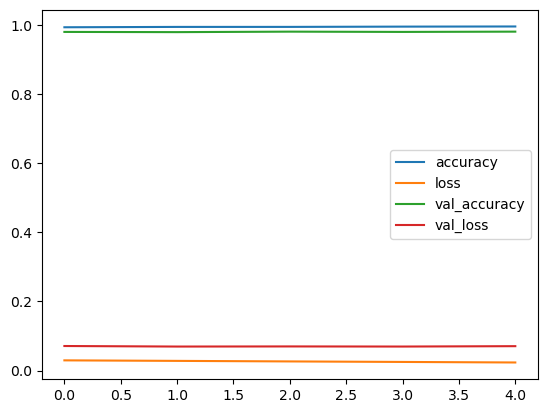

In [35]:
pd.DataFrame(history.history).plot()

In [36]:
model_clf.evaluate(Xte,yte)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9758 - loss: 0.0802


[0.06875099986791611, 0.9789000153541565]

In [37]:
x_new=Xte[:3]

In [40]:
y_pred=model_clf.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Axes: >

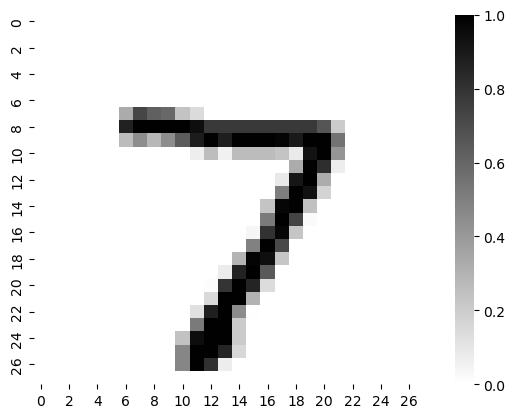

In [43]:
sns.heatmap(x_new[0],cmap='binary')

In [47]:
np.argmax(y_pred.round(),axis=1)

array([7, 2, 1], dtype=int64)

In [48]:
%load_ext tensorboard

In [49]:
%tensorboard --logdir logs/fit

In [51]:
Xtr

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.